In [1]:
import torch
from model import Model, restore
from dataset import ModisDataset, download_url
import matplotlib.pyplot as plt
import numpy as np
import os
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pandas as pd

tumblack = "#000000"
tumblue = "#0065bd"
tumorange = "#e37222"
tumbluelight = "#64a0c8"
tumgray = "#999999"
tumlightgray = "#dad7cb"

In [50]:
dataset = ModisDataset(region="germany",fold="train", znormalize=True)
data = dataset.data
date = dataset.date

local dataset found at /tmp/germany.csv
loading cached dataset found at /tmp/germany.npz


In [60]:
np.asarray(data_df_seen["date"])

array(['2000-02-18T00:00:00.000000000', '2000-03-05T00:00:00.000000000',
       '2000-03-21T00:00:00.000000000', '2000-04-06T00:00:00.000000000',
       '2000-04-22T00:00:00.000000000', '2000-05-08T00:00:00.000000000',
       '2000-05-24T00:00:00.000000000', '2000-06-09T00:00:00.000000000',
       '2000-06-25T00:00:00.000000000', '2000-07-11T00:00:00.000000000',
       '2000-07-27T00:00:00.000000000', '2000-08-12T00:00:00.000000000',
       '2000-08-28T00:00:00.000000000', '2000-09-13T00:00:00.000000000',
       '2000-09-29T00:00:00.000000000', '2000-10-15T00:00:00.000000000',
       '2000-10-31T00:00:00.000000000', '2000-11-16T00:00:00.000000000',
       '2000-12-02T00:00:00.000000000', '2000-12-18T00:00:00.000000000',
       '2001-01-01T00:00:00.000000000', '2001-01-17T00:00:00.000000000',
       '2001-02-02T00:00:00.000000000', '2001-02-18T00:00:00.000000000',
       '2001-03-06T00:00:00.000000000', '2001-03-22T00:00:00.000000000',
       '2001-04-07T00:00:00.000000000', '2001-04-23

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   43
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  77.602
Method:                       css-mle   S.D. of innovations              0.039
Date:                Sat, 04 Jan 2020   AIC                           -141.205
Time:                        14:38:53   BIC                           -128.876
Sample:                    11-30-2000   HQIC                          -136.658
                         - 05-31-2004                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0028      0.031      0.088      0.931      -0.059       0.064
ar.L1.D.y      0.9014      0.149      6.044      0.000       0.609       1.194
ar.L2.D.y      0.0001      0.203      0.001      0.9

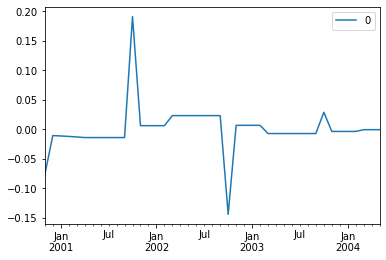

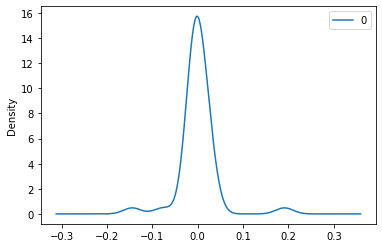

               0
count  43.000000
mean    0.000486
std     0.040909
min    -0.144089
25%    -0.010833
50%    -0.003503
75%     0.006870
max     0.191231


In [106]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

idx = 0
N_seen_points = 100

dt = date[idx].astype(np.datetime64)
x = data[idx,:,0]

data_df = pd.Series(x, index=dt)

data_df_seen = data_df.iloc[:N_seen_points]
data_df_seen = data_df_seen.asfreq('M').interpolate(method='linear',order=2).dropna()

order = (5,1,0)

model = ARIMA(data_df_seen, order=order)
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

2000-03-05   -0.615639
2000-03-12   -0.664860
2000-03-19   -0.714082
2000-03-26   -0.763303
2000-04-02   -0.812525
                ...   
2004-05-09   -0.121580
2004-05-16   -0.121580
2004-05-23   -0.121580
2004-05-30   -0.121580
2004-06-06   -0.121580
Freq: W-SUN, Length: 223, dtype: float64

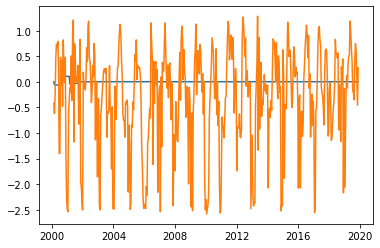

In [108]:
pred = model_fit.predict(start=1, end=dt.shape[0])
fig,ax = plt.subplots()
ax.plot(dt,pred)
ax.plot(dt,x)


In [70]:
dt[:N_seen_points]

array(['2000-02-18', '2000-03-05', '2000-03-21', '2000-04-06',
       '2000-04-22', '2000-05-08', '2000-05-24', '2000-06-09',
       '2000-06-25', '2000-07-11', '2000-07-27', '2000-08-12',
       '2000-08-28', '2000-09-13', '2000-09-29', '2000-10-15',
       '2000-10-31', '2000-11-16', '2000-12-02', '2000-12-18',
       '2001-01-01', '2001-01-17', '2001-02-02', '2001-02-18',
       '2001-03-06', '2001-03-22', '2001-04-07', '2001-04-23',
       '2001-05-09', '2001-05-25', '2001-06-10', '2001-06-26',
       '2001-07-12', '2001-07-28', '2001-08-13', '2001-08-29',
       '2001-09-14', '2001-09-30', '2001-10-16', '2001-11-01',
       '2001-11-17', '2001-12-03', '2001-12-19', '2002-01-01',
       '2002-01-17', '2002-02-02', '2002-02-18', '2002-03-06',
       '2002-03-22', '2002-04-07', '2002-04-23', '2002-05-09',
       '2002-05-25', '2002-06-10', '2002-06-26', '2002-07-12',
       '2002-07-28', '2002-08-13', '2002-08-29', '2002-09-14',
       '2002-09-30', '2002-10-16', '2002-11-01', '2002-

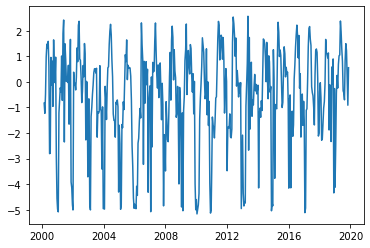

In [35]:
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

date_ = date[0].astype(np.datetime64)
plt.plot(date_,data[0])


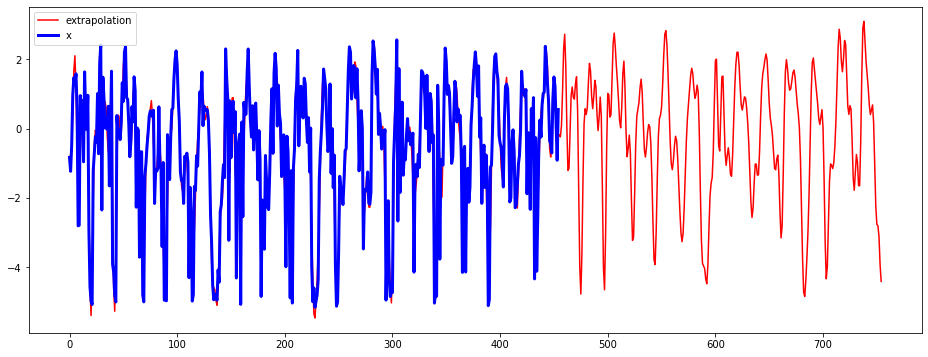

In [78]:
data[0,:,0]

array([-8.31863294e-01, -1.23127812e+00, -4.80204589e-01,  9.72449765e-01,
        1.47605976e+00,  1.30934749e+00,  1.58459640e+00,  6.23395939e-01,
       -2.80636180e+00, -2.79333740e+00,  9.55952196e-01, -1.27677591e-01,
        8.10078955e-01, -9.57765794e-01,  1.64103545e+00,  4.52342199e-01,
       -2.95604711e-02,  9.65503420e-01, -2.93834235e+00, -4.56205045e+00,
       -4.97969943e+00, -5.08215801e+00, -1.21391226e+00, -7.46770571e-01,
       -2.32741056e-01, -4.00321624e-01,  1.01152295e+00, -7.25063243e-01,
        1.87894776e+00,  2.41815777e+00, -2.34963963e+00,  1.48734757e+00,
        8.76937524e-01,  1.81956494e-02,  1.81434752e-01, -2.43507125e-02,
        6.47708146e-01, -1.65326857e+00, -2.07560556e-01,  1.66013790e+00,
       -3.91430379e+00, -4.14353317e+00, -4.80690910e+00, -5.00835310e+00,
        3.78537285e-01, -1.25941005e-01, -5.21360916e-02, -3.15228901e-01,
        1.77093286e-01,  1.32758164e+00,  7.90108214e-01,  2.21237231e+00,
        2.36953336e+00,  

In [67]:
restored_sig.shape

(388,)

In [68]:
t.shape

(388,)

In [69]:
p[0]

1.3907894578204307

In [72]:
extrapolation = restored_sig + p[0] * t

In [74]:
x_notrend = x - p[0] * t  

ValueError: operands could not be broadcast together with shapes (288,) (388,) 